# Film Verileri Analizi

### Kütüphanelerimizi import ediyoruz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### Verimizi içeri aktarıyoruz.

In [2]:
data = pd.read_csv("movies.csv")

In [5]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Eksik verilerin tespiti.

#### Her bir kolon için toplam eksik veri sayıları.

In [7]:
data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

#### Yüzdelik olarak eksik veri hesaplama.

In [12]:
for col in data.columns:
    eksikVeri = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, eksikVeri))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Eksik verilerden kurtulma.

In [15]:
data = data.fillna(0)

#### Eksik veri kontrolü

In [16]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Kolonların tiplerini öğrenmek için type kullanacağız.

In [28]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### yukarda float olarak gözüken bazı alanlar var ihtiyaca göre onları integer hale getirebiliriz.

## code : kolonadı = kolonadı.astype('int64')

In [30]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,0,120.0


Text(0, 0.5, 'Film kazancı')

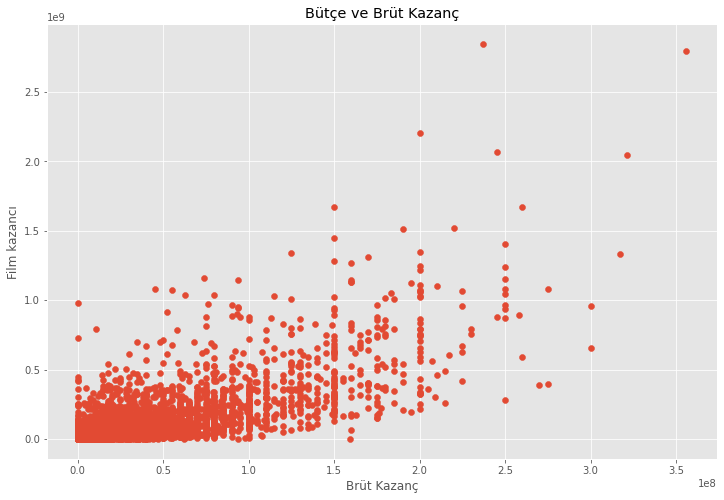

In [34]:
plt.scatter(x=data["budget"], y=data["gross"])

plt.title("Bütçe ve Brüt Kazanç")

plt.xlabel("Brüt Kazanç")

plt.ylabel("Film kazancı")

In [35]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

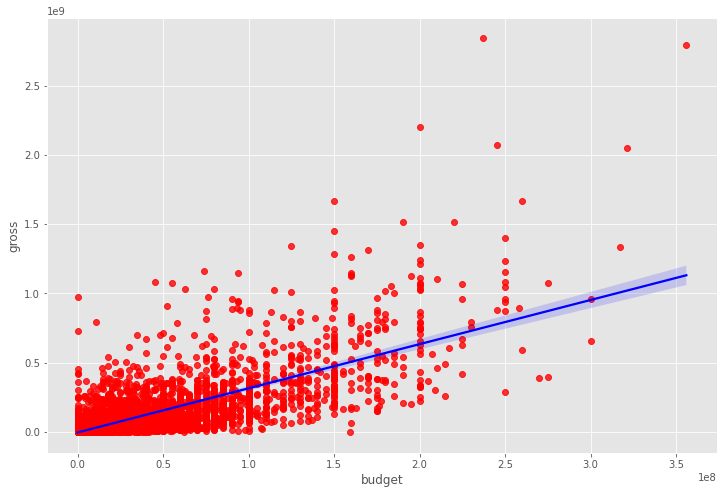

In [36]:
sbn.regplot(x="budget", y="gross", data=data, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [41]:
data.corr(method="pearson") # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [42]:
correlation_matrix = data.corr(method="pearson")

<AxesSubplot:>

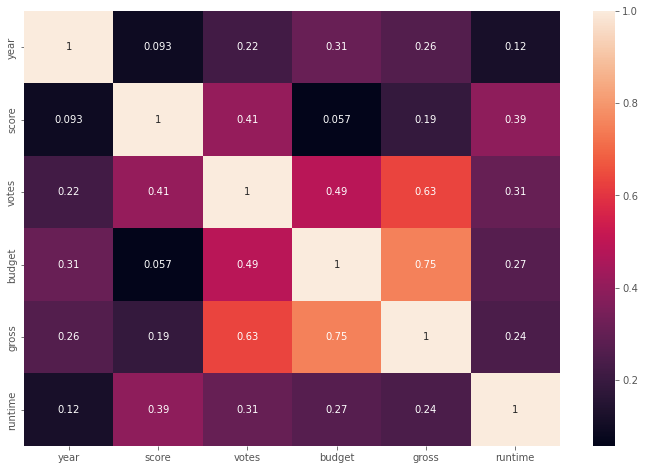

In [44]:
sbn.heatmap(correlation_matrix, annot=True)

In [47]:
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000.0,46998772.0,2320,146.0
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000.0,58853106.0,732,104.0
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000.0,538375067.0,1541,124.0
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000.0,83453539.0,1813,88.0
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000.0,39846344.0,1778,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000.0,0.0,0,90.0
7664,1678,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0.0,0.0,540,90.0
7665,4717,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750.0,0.0,942,0.0
7666,2843,0,6,2020,2818,0.0,0.0,1184,1825,451,56,15000.0,0.0,0,120.0


#### toplu type değiştirme!

In [46]:
dataNum = data

for colName in dataNum.columns:
    if(dataNum[colName].dtype == 'object'):
        dataNum[colName] = dataNum[colName].astype('category')
        dataNum[colName] = dataNum[colName].cat.codes
        
dataNum

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000.0,46998772.0,2320,146.0
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000.0,58853106.0,732,104.0
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000.0,538375067.0,1541,124.0
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000.0,83453539.0,1813,88.0
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000.0,39846344.0,1778,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2965,3.1,18.0,1500,2290,2422,56,7000.0,0.0,0,90.0
7664,1678,0,4,2020,1108,4.7,36.0,774,2615,1887,56,0.0,0.0,540,90.0
7665,4717,0,6,2020,194,5.7,29.0,2061,2684,2041,56,58750.0,0.0,942,0.0
7666,2843,0,6,2020,2818,0.0,0.0,1184,1825,451,56,15000.0,0.0,0,120.0


Text(87.0, 0.5, 'Movie features')

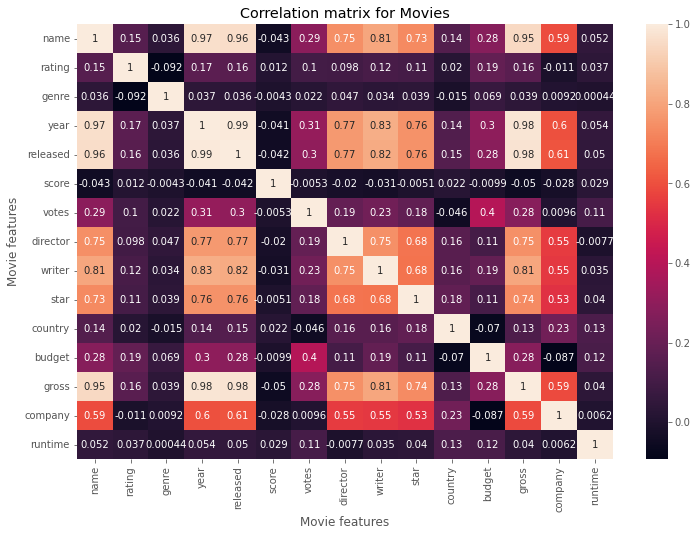

In [48]:
correlation_matrix = data.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sbn.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")


In [51]:
 corrMat = dataNum.corr()

In [53]:
corrPairs = corrMat.unstack()

In [54]:
sortedPairs = corrPairs.sort_values()

In [55]:
sortedPairs

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.234297
genre    gross     -0.234297
votes    genre     -0.145296
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [63]:
highCorr = sortedPairs[(sortedPairs)>0.5]

In [61]:
highCorr

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

#### analiz sonucu oylar ve bütçe, brüt kazançla en yüksek korelasyona sahiptir.
#### şirketler ise düşük korelasyona sahiptir.